In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn import model_selection, ensemble, tree, metrics

/usr/local/lib/python3.9/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
clinicalAngle = pd.read_excel('Shoulder_clinic_angle.xlsx')

In [3]:
clinicalAngle['sex'] = clinicalAngle['sex'].replace(['M'], 1)
clinicalAngle['sex'] = clinicalAngle['sex'].replace(['F'], 0)
clinicalAngle = clinicalAngle.drop(['ID'], axis=1)

In [4]:
clinicalAngle = clinicalAngle[clinicalAngle.group != 'HC']

In [5]:
dataX = clinicalAngle.drop(['group'], axis=1)
dataY = clinicalAngle['group']

train_X, test_X, train_y, test_y = model_selection.train_test_split(dataX, dataY, test_size=0.3)

In [6]:
forest = ensemble.RandomForestClassifier(n_estimators = 100)
forest_fit = forest.fit(train_X, train_y)
forest_predicted = forest.predict(test_X)

In [8]:
metrix = metrics.confusion_matrix(test_y, forest_predicted)
print(metrix)

accuracy = metrics.accuracy_score(test_y, forest_predicted)
print('Accuracy: ',accuracy)

sensitivity = metrix[0,0]/(metrix[0,0]+metrix[0,1])
print('Sensitivity: ', sensitivity)

specificity = metrix[1,1]/(metrix[1,0]+metrix[1,1])
print('Specificity: ', specificity)

[[ 3 10]
 [ 3 19]]
Accuracy:  0.6285714285714286
Sensitivity:  0.23076923076923078
Specificity:  0.8636363636363636


In [9]:
clf = tree.DecisionTreeClassifier(criterion="gini", max_depth=4)
clf.fit(train_X, train_y)
clf_predicted = clf.predict(test_X)

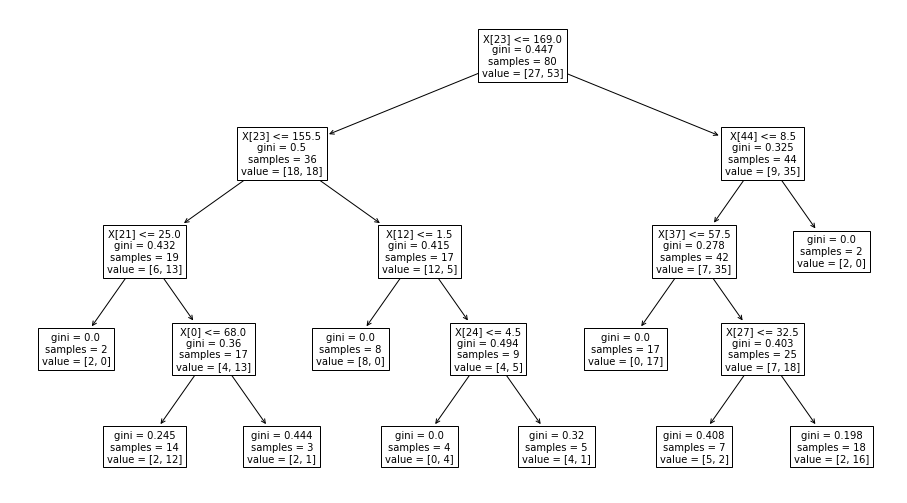

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,9))  # set plot size (denoted in inches)
tree.plot_tree(clf, fontsize=10)
plt.show()

In [11]:
metrix = metrics.confusion_matrix(test_y, clf_predicted)
print(metrix)

accuracy = metrics.accuracy_score(test_y, clf_predicted)
print('Accuracy: ',accuracy)

sensitivity = metrix[0,0]/(metrix[0,0]+metrix[0,1])
print('Sensitivity: ', sensitivity)

specificity = metrix[1,1]/(metrix[1,0]+metrix[1,1])
print('Specificity: ', specificity)

[[ 3 10]
 [ 5 17]]
Accuracy:  0.5714285714285714
Sensitivity:  0.23076923076923078
Specificity:  0.7727272727272727


In [12]:
# t-test
def t_test(group1, group2):
    mean1 = np.mean(group1)
    mean2 = np.mean(group2)

    std1 = np.std(group1)
    std2 = np.std(group2)

    nobs1 = len(group1)
    nobs2 = len(group2)
    
    modified_std1 = np.sqrt(np.float32(nobs1)/
                    np.float32(nobs1-1)) * std1
    modified_std2 = np.sqrt(np.float32(nobs2)/
                    np.float32(nobs2-1)) * std2
    statistic, pvalue = stats.ttest_ind_from_stats( 
               mean1=mean1, std1=modified_std1, nobs1=nobs1,   
               mean2=mean2, std2=modified_std2, nobs2=nobs2 )
    return statistic, pvalue

In [13]:
AC = clinicalAngle[clinicalAngle.group == 'AC']
RCT = clinicalAngle[clinicalAngle.group == 'RCT']

In [14]:
for columns in AC:
    if str(columns) != ('ID' and 'group'):
        statistic, pvalue = t_test(AC[columns], RCT[columns])
        print(f"{columns}: p-value={pvalue}")

age: p-value=0.229747260683459
sex: p-value=0.5755089926600139
pain: p-value=0.9515492903313985
flex_left: p-value=0.6415959791289425
ext_left: p-value=0.5693603937571459
abd_left: p-value=0.44149005332871405
add_left: p-value=0.9658177561774652
horz_abd_left: p-value=0.35159930336556433
horz_add_left: p-value=0.9515568641201562
int_rot_left: p-value=0.30316935270738227
ext_rot_left: p-value=0.05862042916332322
flex_right: p-value=0.13997861776433793
ext_right: p-value=0.12916805467849285
abd_right: p-value=0.10389523762652673
add_right: p-value=0.31817082888717996
horz_abd_right: p-value=0.7887869187810683
horz_add_right: p-value=0.21115556229281096
int_rot_right: p-value=0.14784578980699947
ext_rot_right: p-value=0.25254438320439176
AROM_flex: p-value=0.04425485161013801
AROM_flex_FPS-R: p-value=0.42498413635236676
AROM_ext : p-value=0.005144709942790608
AROM_ext_FPS-R: p-value=0.8339748924105129
AROM_abd: p-value=0.42029479213038645
AROM_abd_FPS-R: p-value=0.29880380475891766
AROM_a